# Project: Wrangling and Analyze Data

## Data Gathering

In [339]:
# importing packages
import pandas as pd
import numpy as np

In [340]:
# loading data into pandas dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [341]:
# Using the Requests library to download the tweet image prediction (image_predictions.tsv)
import requests
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

open('image_predictions.tsv', 'wb').write(response.content)

335079

In [342]:
# Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193


AttributeError: module 'tweepy.errors' has no attribute 'TweepError'

In [343]:
#converting tweet-json.txt to a dataframe
import json
tweet_list = {}
tweet_id = []
retweet_count = []
favorite_count = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        
        tweet_id.append(data['id'])
        retweet_count.append(data['retweet_count'])
        favorite_count.append(data['favorite_count'])
        
        
tweet_dict = {'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count} 
tweet_data = pd.DataFrame(tweet_dict)

## Assessing Data




### A. Twitter Archive Data

In [344]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> - Found Redundant columns(quality)

In [345]:
# consise info of dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

>- Found missing values in some columns(quality)
>- timestamp not datetime(quality)
>- found multiple columns for dog stage(tidiness)

In [346]:
sum(twitter_archive.duplicated())

0

>-  No duplicates 

In [347]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

>- magority of rating denomintor is 10 though some values != 10

In [348]:
# Taking a closer look at rows with rating denomintor !=10
twitter_archive.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [349]:
# delving deeper into the text of rows with rating denominator !=10

index = twitter_archive.query('rating_denominator != 10').index
index_list = list(range(0, len(index)))
for i in index_list:
    print(twitter_archive.iloc[index[i]].text, '('+str(index[i])+')', '( tweet_id - '+ str(twitter_archive.iloc[index[i]].tweet_id)+')')
    print()

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho (313) ( tweet_id - 835246439529840640)

@docmisterio account started on 11/15/15 (342) ( tweet_id - 832088576586297345)

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd (433) ( tweet_id - 820690176645140481)

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx (516) ( tweet_id - 810984652412424192)

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/… (784) ( tweet_id - 775096608509886464)

Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE (902) ( tweet_id - 758467244762497024)

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XA

>- Looking at the text from rows with rating denominator != 10 some ratings were incorrectly extracted eg tweet ID ( 835246439529840640, 775096608509886464, 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296 ) 
>- tweet with ID 810984652412424192 has no rating
>- tweet with ID 832088576586297345 not dog rating (text: @docmisterio account started on 11/15/15)

In [350]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

>- Found incorrect dog names

### B. Image Predictions

In [351]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [352]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


>- No missing values

In [353]:
sum(image_predictions.duplicated())

0

>- No duplicates

In [354]:
image_predictions.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [355]:
# taking a closer look at some values that seem off
image_predictions.query("p1 == ['microphone', 'refrigerator', 'toilet_seat', 'water_bottle'] ")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
277,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False
290,671166507850801152,https://pbs.twimg.com/media/CVB2TnWUYAA2pAU.jpg,1,refrigerator,0.829772,False,toilet_seat,0.030083,False,shower_curtain,0.015461,False
403,673700254269775872,https://pbs.twimg.com/media/CVl2ydUWsAA1jD6.jpg,1,water_bottle,0.614536,False,ashcan,0.050911,False,bucket,0.037432,False
411,673906403526995968,https://pbs.twimg.com/media/CVoySqoWUAAWb7N.jpg,1,toilet_seat,0.683319,False,soft-coated_wheaten_terrier,0.048928,True,Siberian_husky,0.030386,True
734,686947101016735744,https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg,1,refrigerator,0.799795,False,medicine_chest,0.182538,False,ice_bear,0.001431,False
1536,790581949425475584,https://pbs.twimg.com/media/Cvi2FiKWgAAif1u.jpg,2,refrigerator,0.998886,False,malinois,0.000153,True,kelpie,0.000131,True


In [418]:
images = image_predictions.query("p1 == ['microphone', 'toilet_seat', 'water_bottle', 'refrigerator',] ")['jpg_url'].values
images

array(['https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg',
       'https://pbs.twimg.com/media/CVB2TnWUYAA2pAU.jpg',
       'https://pbs.twimg.com/media/CVl2ydUWsAA1jD6.jpg',
       'https://pbs.twimg.com/media/CVoySqoWUAAWb7N.jpg',
       'https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg',
       'https://pbs.twimg.com/media/Cvi2FiKWgAAif1u.jpg'], dtype=object)

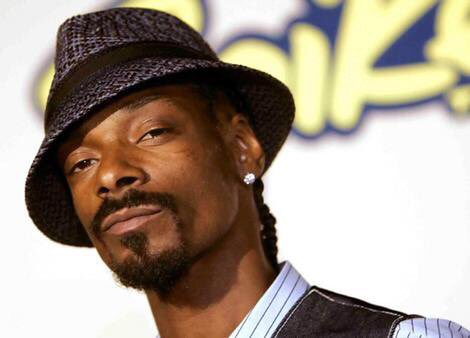

In [357]:
from IPython import display
display.Image('https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg')

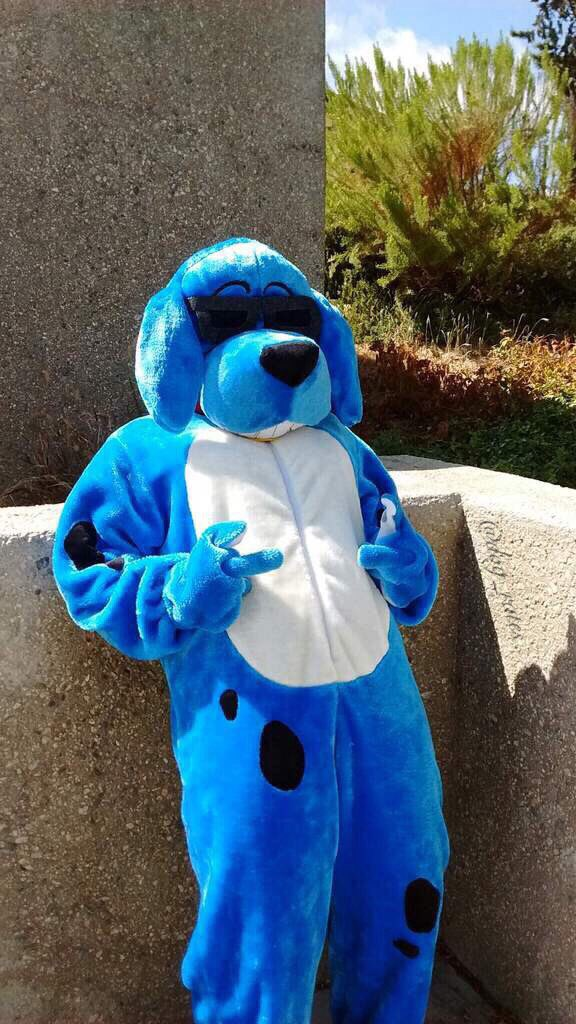

In [358]:
display.Image('https://pbs.twimg.com/media/CVl2ydUWsAA1jD6.jpg')

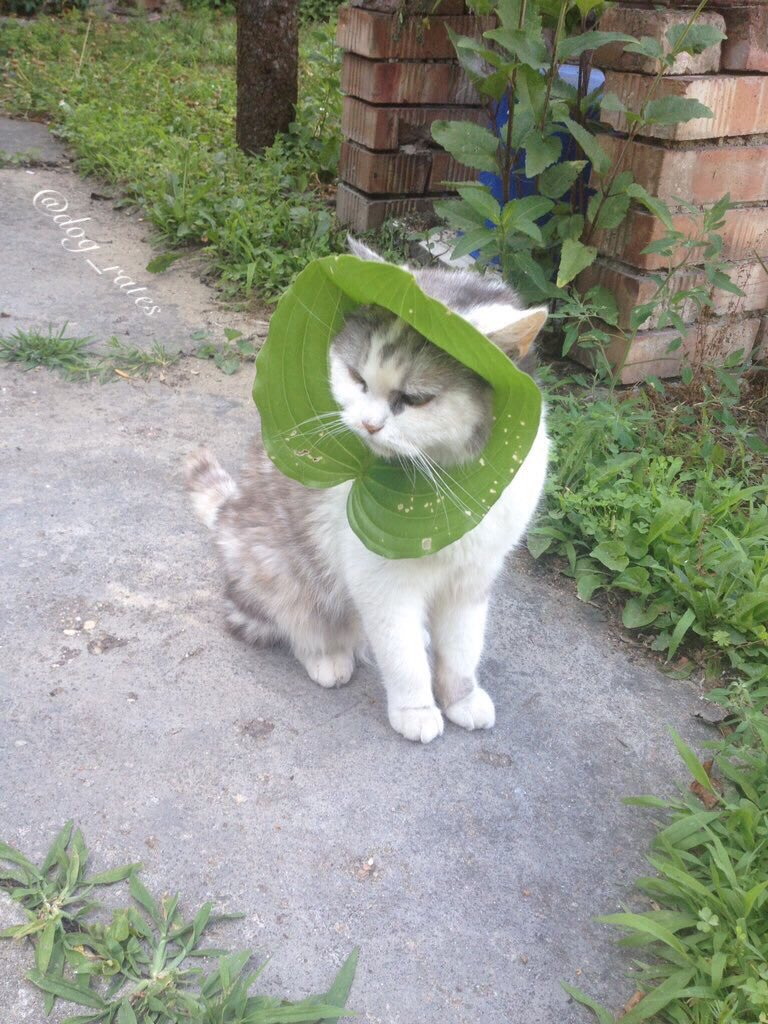

In [359]:
display.Image('https://pbs.twimg.com/media/CVoySqoWUAAWb7N.jpg')

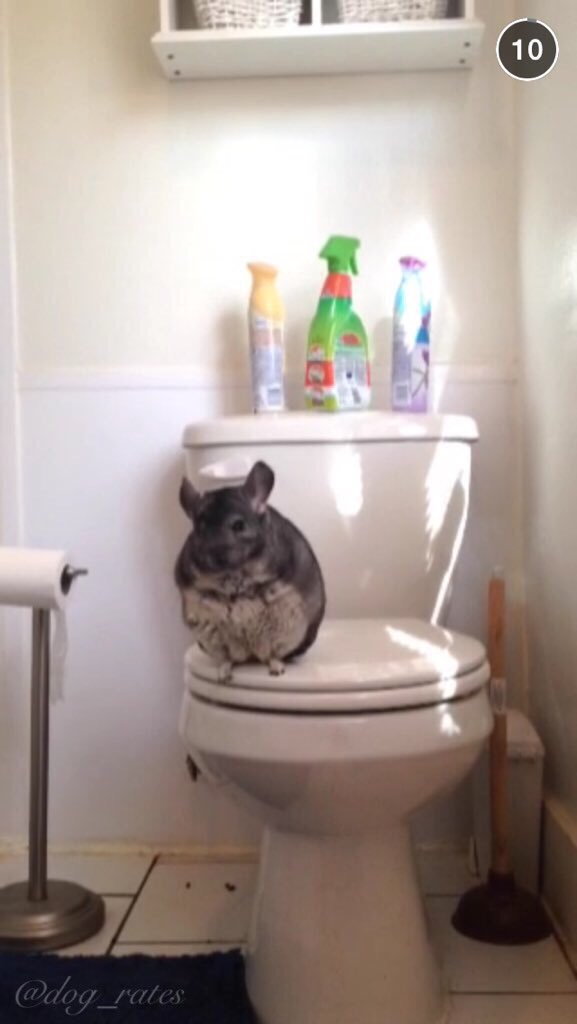

In [468]:
display.Image('https://pbs.twimg.com/media/CVB2TnWUYAA2pAU.jpg')


>- found some non-dog images 

### C. Tweet Data

In [361]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [362]:
tweet_data.shape

(2354, 3)

In [363]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [364]:
tweet_data.sample(10)

,tweet_id,retweet_count,favorite_count
2143,669926384437997569,115,400
261,842765311967449089,1439,7321
685,788070120937619456,3952,0
1523,690400367696297985,509,2041
1814,676606785097199616,490,2039
2127,670290420111441920,315,750
2134,670055038660800512,357,716
265,841833993020538882,17504,0
870,761371037149827077,20500,0
1628,684538444857667585,1085,2915


### Quality issues
<b>A. Twitter Archive Data</b>
1. Missing data in <b>in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls </b> columns
2. Data type of  <b>timestamp</b> column string and not datetime
3. Redundant columns <b>(retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)</b>
4. Incorrect ratings(eg. some rating values incorrectly extracted) 
5. Ratings with decimal values in numeratator incorrectly extracted
6. Invalid dog name such as <b>a, not, an, his, all, old, the, by, officially, space</b> etc 
 

<b>B. Image prediction Data</b>
1. Pictures not dogs <b>(ex. values on index 227, 290, 411, and 403 ) </b> in <b>P1</b> column
2. Dog names not standardized

### Tidness issues
1. Multiple columns for dog type on Twitter Archive Data
2. All 3 data sets  refer to same type of oberservation of a perticular sets of tweets but contained in 3 seprate dataframes

## Cleaning Data


In [365]:
# Making copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

### Issue #1: 

#### Define:
- Drop retweet rows
- Drop <b>in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, </b>and<b> retweeted_status_timestamp</b> columns since <b>over 90% of the rows in these columns are null</b>

#### Code

In [366]:
# dropping retweet rows
index = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()].index
twitter_archive_clean.drop(index, inplace=True)

# Droping column with majority null values 
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
                            'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [367]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue#2:

#### Define
- Drop rows containing NAN in <b>expanded_urls</b> columns

#### Code

In [368]:
# Droping rows with na values in expanded_urls columns
twitter_archive_clean.dropna(axis =0, inplace=True)

#### Test

In [369]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2117 non-null   int64 
 1   timestamp           2117 non-null   object
 2   source              2117 non-null   object
 3   text                2117 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2117 non-null   int64 
 6   rating_denominator  2117 non-null   int64 
 7   name                2117 non-null   object
 8   doggo               2117 non-null   object
 9   floofer             2117 non-null   object
 10  pupper              2117 non-null   object
 11  puppo               2117 non-null   object
dtypes: int64(3), object(9)
memory usage: 215.0+ KB


### Issue#3:

#### Define:
- Convert timestamp column to datetime

#### Code

In [370]:
# Converting timestamp column to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [371]:
twitter_archive_clean.timestamp.dtype

datetime64[ns, UTC]

### Issue#4

#### Define:
- Update incorrect ratings for rows where rating denomintor wrongly extracted

#### Code

In [372]:
# getting the index of affected rows 

tweet_ID = [810984652412424192, 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296]
index_list=[]
for id in tweet_ID:
    index = twitter_archive_clean[twitter_archive_clean.tweet_id == id].index
    index_list.append(index)
    
index_list

[Int64Index([516], dtype='int64'),
 Int64Index([1068], dtype='int64'),
 Int64Index([1165], dtype='int64'),
 Int64Index([1202], dtype='int64'),
 Int64Index([1662], dtype='int64'),
 Int64Index([2335], dtype='int64')]

In [469]:
# updating rows with correct values gotten from tweet text
# pls note: these values for the rating was mannually extracted from the text

twitter_archive_clean.loc[1068, 'rating_numerator':'rating_denominator'] = [14, 10]
twitter_archive_clean.loc[1165, 'rating_numerator':'rating_denominator'] = [13, 10]
twitter_archive_clean.loc[1202, 'rating_numerator':'rating_denominator'] = [11, 10]
twitter_archive_clean.loc[1662, 'rating_numerator':'rating_denominator'] = [10, 10]
twitter_archive_clean.loc[2335, 'rating_numerator':'rating_denominator'] = [9, 10]

twitter_archive_clean.drop(516, axis=0, inplace=True)

KeyError: '[516] not found in axis'

>- Tweet ID 810984652412424192 has no rating in text hence row was 

#### Test


In [374]:
twitter_archive_clean.loc[[1068, 1165, 1202, 1662, 2335]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,None,None,None,None
2335,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,an,None,None,None,None


In [375]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2116 non-null   int64              
 1   timestamp           2116 non-null   datetime64[ns, UTC]
 2   source              2116 non-null   object             
 3   text                2116 non-null   object             
 4   expanded_urls       2116 non-null   object             
 5   rating_numerator    2116 non-null   int64              
 6   rating_denominator  2116 non-null   int64              
 7   name                2116 non-null   object             
 8   doggo               2116 non-null   object             
 9   floofer             2116 non-null   object             
 10  pupper              2116 non-null   object             
 11  puppo               2116 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue#5

#### Define:
>- Replace inappropriate name values with None

#### Code

In [376]:
incorrect_names = twitter_archive_clean[twitter_archive_clean.name.str.islower()].name.value_counts().index
twitter_archive_clean.replace(to_replace=incorrect_names, value= 'None', inplace=True)

#### Test

In [377]:
twitter_archive_clean[twitter_archive_clean.name.str.islower()].name.value_counts()

Series([], Name: name, dtype: int64)

### Issue#6

#### Define:
>- Drop rows with non-dog images


#### Code

In [378]:
image_predictions_clean.drop([227, 290, 411, 403] , inplace=True)

In [420]:
image_predictions_clean.drop(image_predictions_clean.query('p1 == "microphone" or p1 == "refrigerator" or\
                                                            p1 == "toilet_sea" or p1 == "water_bottle"').index, axis=0, 
                                                             inplace = True)

#### Test

In [422]:
image_predictions_clean.query('p1 == "microphone" or p1 == "refrigerator" or p1 == "toilet_sea" or p1 == "water_bottle"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue#7

#### Define:
>- Standardize Dog breed names

#### Code

In [423]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.lower()
image_predictions_clean.p2 = image_predictions_clean.p2.str.lower()
image_predictions_clean.p3 = image_predictions_clean.p3.str.lower()

#### Test

In [424]:
print(all(image_predictions_clean.p1.str.islower()))
print(all(image_predictions_clean.p2.str.islower()))
print(all(image_predictions_clean.p3.str.islower()))

True
True
True


### Issue#8

#### Define:
>- Manually extract rating from text where rating numerator contains decimals and update ratings

#### Code

In [425]:
ratings = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [426]:
ratings = ratings.astype(float)


0    float64
1    float64
dtype: object

In [427]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean.rating_numerator = ratings[0]


0    float64
1    float64
dtype: object

#### Test

In [428]:
twitter_archive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                  int64
name                               object
dog_stage                          object
dtype: object

### Issue#9

#### Define:
>- Collapse multiple rows for dog type to one column 'stage'

#### Code

In [429]:
dog_stage = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean['dog_stage'] = dog_stage

twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'doggo'

In [430]:
list(twitter_archive_clean.dog_stage.unique())

['None',
 'doggo',
 'puppo',
 'pupper',
 'floofer',
 'doggo, puppo',
 'doggo, floofer',
 'doggo, pupper']

In [431]:
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.map(lambda x: x.replace('None', ''))

In [432]:
twitter_archive_clean.dog_stage.value_counts()

                  1778
pupper             222
doggo               72
puppo               23
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [433]:
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = 'None'

#### Test

In [434]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2116 non-null   int64              
 1   timestamp           2116 non-null   datetime64[ns, UTC]
 2   source              2116 non-null   object             
 3   text                2116 non-null   object             
 4   expanded_urls       2116 non-null   object             
 5   rating_numerator    2116 non-null   float64            
 6   rating_denominator  2116 non-null   int64              
 7   name                2116 non-null   object             
 8   dog_stage           2116 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 245.3+ KB


### Issue#10

#### Define:
>- Merge tweet_data and image_predictions to twitter_archive data

#### Code

In [437]:
twitter_archive_master = pd.merge(twitter_archive_clean, image_predictions_clean)
twitter_archive_master = pd.merge(twitter_archive_master, tweet_data_clean, )
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,None,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,41,111
1982,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,None,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311
1983,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,None,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128
1984,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,None,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,48,132


#### Test

In [438]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   int64              
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   expanded_urls       1986 non-null   object             
 5   rating_numerator    1986 non-null   float64            
 6   rating_denominator  1986 non-null   int64              
 7   name                1986 non-null   object             
 8   dog_stage           1986 non-null   object             
 9   jpg_url             1986 non-null   object             
 10  img_num             1986 non-null   int64              
 11  p1                  1986 non-null   object             
 12  p1_conf             1986 non-null 

## Storing Data


In [470]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data


In [440]:
import matplotlib.pyplot as plt

### Insight : Research Questions

1. Which type of dog(stage) got the highest retweet count?
2. Which type of dog(stage) got the highest favorite count?
3. What are the first 3 dogs with the highest rating numerator score?

>1. Type of dog(stage) that got highest retweet

In [441]:
twitter_archive_master.dog_stage.value_counts()

None              1680
pupper             203
doggo               63
puppo               22
doggo, pupper        9
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [442]:
by_stages = twitter_archive_master.query('dog_stage=="pupper" or dog_stage=="doggo" or dog_stage=="puppo" or dog_stage=="floofer"')

In [443]:
by_stage_retweet_count = by_stages.groupby('dog_stage').sum()['retweet_count'].sort_values()
by_stage_retweet_count

dog_stage
floofer     34781.0
puppo      142427.0
doggo      448919.0
pupper     479807.0
Name: retweet_count, dtype: float64

#### Visualization

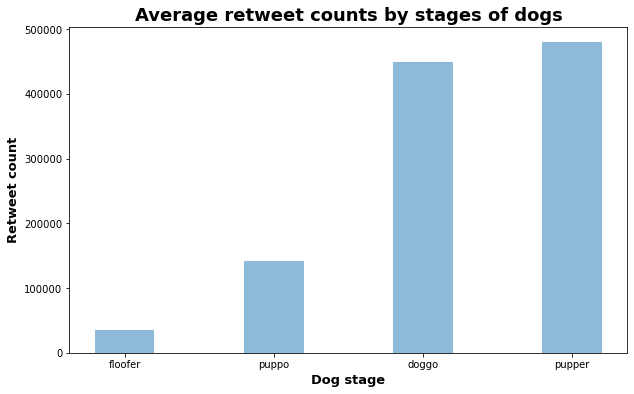

In [444]:
plt.figure(figsize=(10,6));
x = by_stage_retweet_count.index
y = by_stage_retweet_count.values
plt.bar(x, y, width = 0.4, alpha=.5);
plt.xlabel('Dog stage', weight='bold', fontsize=13.0)
plt.ylabel('Retweet count', weight='bold', fontsize=13.0)
plt.title('Average retweet counts by stages of dogs', weight='bold', fontsize=18.0);


>- From the analysis and visualization above <b>pupper</b> dogs generally seem to have more retweet counts followed by doggo, puppo, and floofer respectively

>2. Which type of dog got the highest favorite count

In [445]:
by_stage_favorite_count = by_stages.groupby('dog_stage').sum()['favorite_count'].sort_values()
by_stage_favorite_count

dog_stage
floofer      92442.0
puppo       474806.0
doggo      1219452.0
pupper     1461141.0
Name: favorite_count, dtype: float64

#### Visualization

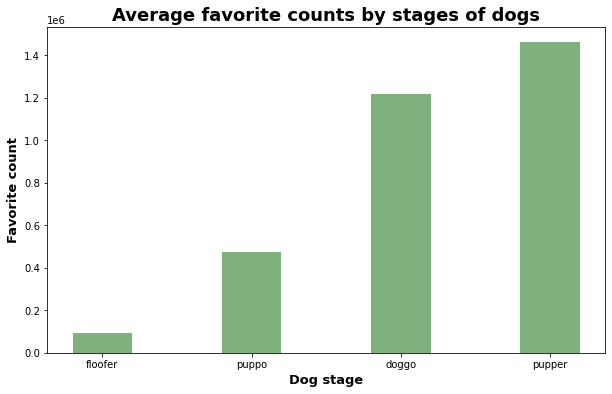

In [446]:
plt.figure(figsize=(10,6));
x = by_stage_favorite_count.index
y = by_stage_favorite_count.values
plt.bar(x, y, width = 0.4, color='darkgreen', alpha=.5);
plt.xlabel('Dog stage', weight='bold', fontsize=13.0)
plt.ylabel('Favorite count', weight='bold', fontsize=13.0)
plt.title('Average favorite counts by stages of dogs', weight='bold', fontsize=18.0);

>- From the analysis and visualization above <b>pupper</b> dogs seem to have more favorite counts followed by doggo, puppp, and floofer respectively 

>3. What are the first 3 dogs with the highest rating numerator score

In [447]:
index = twitter_archive_master.rating_numerator.sort_values(ascending=False)[:3]
index

724    1776.0
846     204.0
660     165.0
Name: rating_numerator, dtype: float64

In [451]:
top_3 = twitter_archive_master.iloc[[724, 846, 660]]
top_3

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
724,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,2772,5569
846,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204.0,170,None,None,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,...,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,1434,4196
660,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165.0,150,None,None,https://pbs.twimg.com/ext_tw_video_thumb/75846...,...,0.436377,True,chihuahua,0.113956,True,american_staffordshire_terrier,0.099689,True,2539,5316


In [452]:
top_3.p1

724               bow_tie
846              lakeside
660    labrador_retriever
Name: p1, dtype: object

#### Visualization

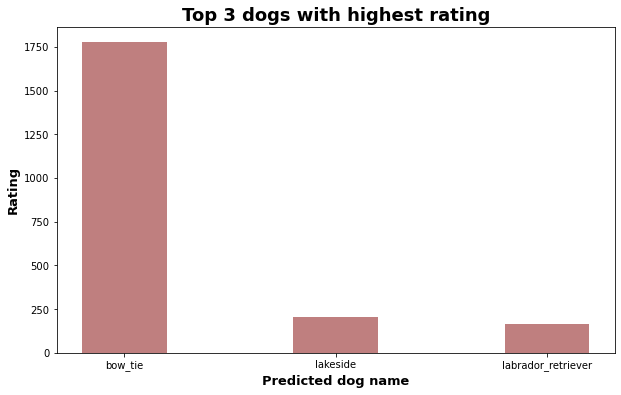

In [453]:
plt.figure(figsize=(10,6));
x = top_3.p1
y = top_3.rating_numerator
plt.bar(x, y, width = 0.4, color='maroon', alpha=.5);
plt.xlabel('Predicted dog name', weight='bold', fontsize=13.0)
plt.ylabel('Rating', weight='bold', fontsize=13.0)
plt.title('Top 3 dogs with highest rating', weight='bold', fontsize=18.0);

>- From the analysis and visualization above the three dogs with the highest numerator rating are <b>bow_tie, lakeside </b>and  <b>labrador_retriever</b> respectively (according to the prediction of the image)

>- Below Are the images hsving the higest ratings

bow_tie


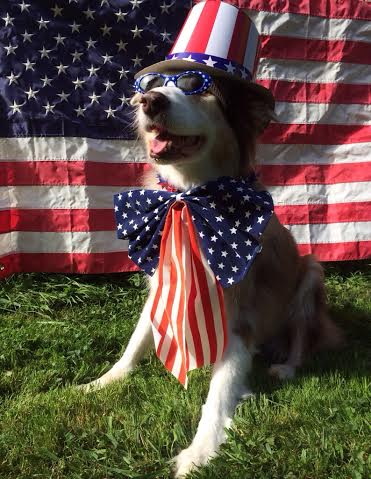

In [464]:
url = top_3.iloc[0].jpg_url
print(top_3.iloc[0].p1)
display.Image(url)


lakeside


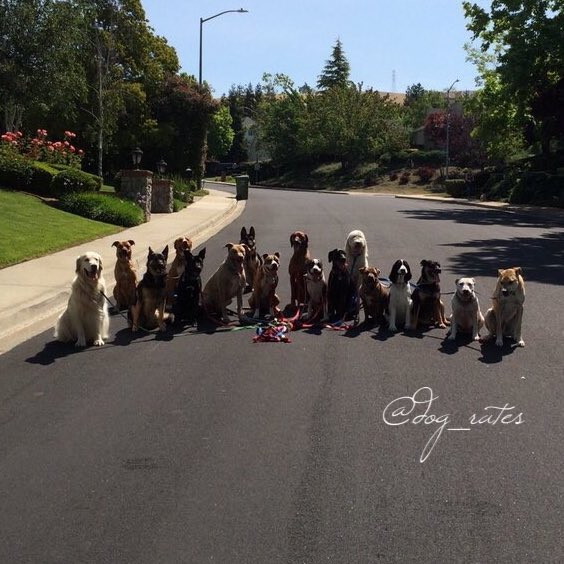

In [466]:
url = top_3.iloc[1].jpg_url
print(top_3.iloc[1].p1)
display.Image(url)

labrador_retriever


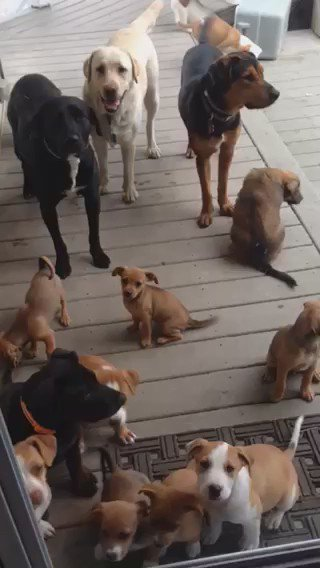

In [467]:
url = top_3.iloc[2].jpg_url
print(top_3.iloc[2].p1)
display.Image(url)